In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df=pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
# null 값
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
# 전체 데이터에서 만족과 불만족의 비율
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied 비율 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율 0.04


In [4]:
cust_df.describe()

# ID 피처와 var3의 -999999값 처리

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True) # 최빈값으로 대치
cust_df.drop('ID', axis=1, inplace=True)

X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [8]:
# target값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt=y_train.count()
test_cnt=y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf=XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf=XGBClassifier(n_estimators=100)

params={'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv=GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)
xgb_roc_score=roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.801624	validation_1-auc:0.800495
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.811422	validation_1-auc:0.808666
[2]	validation_0-auc:0.800355	validation_1-auc:0.802896
[3]	validation_0-auc:0.817338	validation_1-auc:0.818038
[4]	validation_0-auc:0.808978	validation_1-auc:0.813371
[5]	validation_0-auc:0.816625	validation_1-auc:0.822296
[6]	validation_0-auc:0.829195	validation_1-auc:0.829323
[7]	validation_0-auc:0.818478	validation_1-auc:0.820464
[8]	validation_0-auc:0.824945	validation_1-auc:0.826035
[9]	validation_0-auc:0.828372	validation_1-auc:0.827808
[10]	validation_0-auc:0.828612	validation_1-auc:0.826513
[11]	validation_0-auc:0.826657	validation_1-auc:0.823901
[12]	validation_0-auc:0.824943	validation_1-auc:0.822808
[13]	validation_0-auc:0.821565	validation_1-auc:0.820969
[14]	validation_0-auc:0.82657	validation_1-auc:0.824641

[53]	validation_0-auc:0.864542	validation_1-auc:0.844672
[54]	validation_0-auc:0.864842	validation_1-auc:0.844513
[55]	validation_0-auc:0.86535	validation_1-auc:0.844708
[56]	validation_0-auc:0.865721	validation_1-auc:0.844315
[57]	validation_0-auc:0.866143	validation_1-auc:0.844399
[58]	validation_0-auc:0.866773	validation_1-auc:0.844402
[59]	validation_0-auc:0.866923	validation_1-auc:0.844509
[60]	validation_0-auc:0.867242	validation_1-auc:0.844529
[61]	validation_0-auc:0.867392	validation_1-auc:0.844557
[62]	validation_0-auc:0.86783	validation_1-auc:0.844561
[63]	validation_0-auc:0.86804	validation_1-auc:0.844805
[64]	validation_0-auc:0.868316	validation_1-auc:0.844857
[65]	validation_0-auc:0.868621	validation_1-auc:0.844873
[66]	validation_0-auc:0.86896	validation_1-auc:0.844523
[67]	validation_0-auc:0.86925	validation_1-auc:0.844251
[68]	validation_0-auc:0.869503	validation_1-auc:0.84413
[69]	validation_0-auc:0.870102	validation_1-auc:0.844201
[70]	validation_0-auc:0.870397	valida

[98]	validation_0-auc:0.875112	validation_1-auc:0.841738
[99]	validation_0-auc:0.875347	validation_1-auc:0.841585
[0]	validation_0-auc:0.802666	validation_1-auc:0.80308
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.810959	validation_1-auc:0.80954
[2]	validation_0-auc:0.800737	validation_1-auc:0.806395
[3]	validation_0-auc:0.81665	validation_1-auc:0.819089
[4]	validation_0-auc:0.808244	validation_1-auc:0.814372
[5]	validation_0-auc:0.814397	validation_1-auc:0.822249
[6]	validation_0-auc:0.827845	validation_1-auc:0.829956
[7]	validation_0-auc:0.819184	validation_1-auc:0.822759
[8]	validation_0-auc:0.826357	validation_1-auc:0.82811
[9]	validation_0-auc:0.82959	validation_1-auc:0.82873
[10]	validation_0-auc:0.82922	validation_1-auc:0.826981
[11]	validation_0-auc:0.827832	validation_1-auc:0.825701
[12]	validation_0-auc:0.826415	validation_1-auc:0.824145
[13]	

[54]	validation_0-auc:0.862258	validation_1-auc:0.843322
[55]	validation_0-auc:0.86244	validation_1-auc:0.843517
[56]	validation_0-auc:0.862763	validation_1-auc:0.843525
[57]	validation_0-auc:0.862997	validation_1-auc:0.843193
[58]	validation_0-auc:0.863329	validation_1-auc:0.843293
[59]	validation_0-auc:0.863498	validation_1-auc:0.843146
[60]	validation_0-auc:0.863666	validation_1-auc:0.843179
[61]	validation_0-auc:0.86416	validation_1-auc:0.84308
[62]	validation_0-auc:0.864408	validation_1-auc:0.843149
[63]	validation_0-auc:0.864491	validation_1-auc:0.843132
[64]	validation_0-auc:0.864819	validation_1-auc:0.843418
[65]	validation_0-auc:0.865043	validation_1-auc:0.843318
[66]	validation_0-auc:0.865241	validation_1-auc:0.843568
[67]	validation_0-auc:0.865373	validation_1-auc:0.843439
[68]	validation_0-auc:0.865428	validation_1-auc:0.843425
[69]	validation_0-auc:0.865851	validation_1-auc:0.843542
[70]	validation_0-auc:0.865951	validation_1-auc:0.843448
[71]	validation_0-auc:0.866044	val

[8]	validation_0-auc:0.835754	validation_1-auc:0.830352
[9]	validation_0-auc:0.837871	validation_1-auc:0.83012
[10]	validation_0-auc:0.839268	validation_1-auc:0.830249
[11]	validation_0-auc:0.839881	validation_1-auc:0.829175
[12]	validation_0-auc:0.838448	validation_1-auc:0.827676
[13]	validation_0-auc:0.837111	validation_1-auc:0.826675
[14]	validation_0-auc:0.84182	validation_1-auc:0.829645
[15]	validation_0-auc:0.842315	validation_1-auc:0.828174
[16]	validation_0-auc:0.84546	validation_1-auc:0.830474
[17]	validation_0-auc:0.844179	validation_1-auc:0.830145
[18]	validation_0-auc:0.843977	validation_1-auc:0.829142
[19]	validation_0-auc:0.844323	validation_1-auc:0.827449
[20]	validation_0-auc:0.848256	validation_1-auc:0.829859
[21]	validation_0-auc:0.848107	validation_1-auc:0.828818
[22]	validation_0-auc:0.851934	validation_1-auc:0.830441
[23]	validation_0-auc:0.851668	validation_1-auc:0.829047
[24]	validation_0-auc:0.850761	validation_1-auc:0.828987
[25]	validation_0-auc:0.850346	valid

[77]	validation_0-auc:0.891571	validation_1-auc:0.844599
[78]	validation_0-auc:0.891754	validation_1-auc:0.844471
[79]	validation_0-auc:0.892043	validation_1-auc:0.84401
[80]	validation_0-auc:0.892126	validation_1-auc:0.844158
[81]	validation_0-auc:0.892188	validation_1-auc:0.843965
Stopping. Best iteration:
[51]	validation_0-auc:0.883613	validation_1-auc:0.845156

[0]	validation_0-auc:0.817353	validation_1-auc:0.81178
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828329	validation_1-auc:0.82711
[2]	validation_0-auc:0.826005	validation_1-auc:0.822316
[3]	validation_0-auc:0.834169	validation_1-auc:0.828657
[4]	validation_0-auc:0.830084	validation_1-auc:0.826876
[5]	validation_0-auc:0.832321	validation_1-auc:0.829062
[6]	validation_0-auc:0.839049	validation_1-auc:0.833237
[7]	validation_0-auc:0.834898	validation_1-auc:0.828545
[8]	validation_0-auc:0.838399

[48]	validation_0-auc:0.874491	validation_1-auc:0.840586
[49]	validation_0-auc:0.874768	validation_1-auc:0.840152
[50]	validation_0-auc:0.875232	validation_1-auc:0.840274
[51]	validation_0-auc:0.875713	validation_1-auc:0.840262
[52]	validation_0-auc:0.876377	validation_1-auc:0.839996
[53]	validation_0-auc:0.876619	validation_1-auc:0.83998
[54]	validation_0-auc:0.877393	validation_1-auc:0.839917
[55]	validation_0-auc:0.877489	validation_1-auc:0.839598
[56]	validation_0-auc:0.877648	validation_1-auc:0.839701
[57]	validation_0-auc:0.877789	validation_1-auc:0.83974
[58]	validation_0-auc:0.877802	validation_1-auc:0.839639
[59]	validation_0-auc:0.877989	validation_1-auc:0.839318
[60]	validation_0-auc:0.878329	validation_1-auc:0.839477
[61]	validation_0-auc:0.8785	validation_1-auc:0.839352
[62]	validation_0-auc:0.878562	validation_1-auc:0.839469
[63]	validation_0-auc:0.878663	validation_1-auc:0.839361
[64]	validation_0-auc:0.878677	validation_1-auc:0.839367
[65]	validation_0-auc:0.879024	vali

[24]	validation_0-auc:0.8523	validation_1-auc:0.831206
[25]	validation_0-auc:0.852396	validation_1-auc:0.829622
[26]	validation_0-auc:0.855154	validation_1-auc:0.833178
[27]	validation_0-auc:0.857661	validation_1-auc:0.834336
[28]	validation_0-auc:0.85708	validation_1-auc:0.834516
[29]	validation_0-auc:0.859542	validation_1-auc:0.834919
[30]	validation_0-auc:0.861459	validation_1-auc:0.836129
[31]	validation_0-auc:0.863917	validation_1-auc:0.837097
[32]	validation_0-auc:0.864067	validation_1-auc:0.836004
[33]	validation_0-auc:0.866133	validation_1-auc:0.836852
[34]	validation_0-auc:0.86614	validation_1-auc:0.837338
[35]	validation_0-auc:0.867146	validation_1-auc:0.839003
[36]	validation_0-auc:0.8683	validation_1-auc:0.839931
[37]	validation_0-auc:0.868382	validation_1-auc:0.840111
[38]	validation_0-auc:0.868991	validation_1-auc:0.839529
[39]	validation_0-auc:0.870537	validation_1-auc:0.840948
[40]	validation_0-auc:0.871777	validation_1-auc:0.841491
[41]	validation_0-auc:0.872577	valida

[10]	validation_0-auc:0.836143	validation_1-auc:0.827882
[11]	validation_0-auc:0.835176	validation_1-auc:0.826244
[12]	validation_0-auc:0.835365	validation_1-auc:0.827303
[13]	validation_0-auc:0.837682	validation_1-auc:0.827791
[14]	validation_0-auc:0.83943	validation_1-auc:0.828435
[15]	validation_0-auc:0.838524	validation_1-auc:0.82907
[16]	validation_0-auc:0.839974	validation_1-auc:0.829741
[17]	validation_0-auc:0.842791	validation_1-auc:0.831571
[18]	validation_0-auc:0.844097	validation_1-auc:0.834036
[19]	validation_0-auc:0.844351	validation_1-auc:0.834306
[20]	validation_0-auc:0.845857	validation_1-auc:0.835052
[21]	validation_0-auc:0.846728	validation_1-auc:0.835749
[22]	validation_0-auc:0.848545	validation_1-auc:0.837802
[23]	validation_0-auc:0.849115	validation_1-auc:0.838176
[24]	validation_0-auc:0.849836	validation_1-auc:0.838496
[25]	validation_0-auc:0.849556	validation_1-auc:0.838341
[26]	validation_0-auc:0.850676	validation_1-auc:0.839305
[27]	validation_0-auc:0.851539	va

[73]	validation_0-auc:0.870525	validation_1-auc:0.842768
[74]	validation_0-auc:0.87084	validation_1-auc:0.842653
[75]	validation_0-auc:0.871132	validation_1-auc:0.842491
[76]	validation_0-auc:0.871192	validation_1-auc:0.842509
[77]	validation_0-auc:0.871438	validation_1-auc:0.842421
[78]	validation_0-auc:0.871735	validation_1-auc:0.842409
[79]	validation_0-auc:0.872073	validation_1-auc:0.842337
[80]	validation_0-auc:0.872339	validation_1-auc:0.842237
[81]	validation_0-auc:0.872397	validation_1-auc:0.842246
[82]	validation_0-auc:0.872504	validation_1-auc:0.842163
[83]	validation_0-auc:0.87257	validation_1-auc:0.842117
[84]	validation_0-auc:0.872643	validation_1-auc:0.842087
[85]	validation_0-auc:0.872792	validation_1-auc:0.84209
[86]	validation_0-auc:0.872889	validation_1-auc:0.842078
[87]	validation_0-auc:0.873104	validation_1-auc:0.841917
[88]	validation_0-auc:0.873288	validation_1-auc:0.842035
[89]	validation_0-auc:0.87354	validation_1-auc:0.841952
[90]	validation_0-auc:0.873639	vali

[45]	validation_0-auc:0.860604	validation_1-auc:0.841712
[46]	validation_0-auc:0.860944	validation_1-auc:0.841669
[47]	validation_0-auc:0.861241	validation_1-auc:0.841771
[48]	validation_0-auc:0.86152	validation_1-auc:0.841658
[49]	validation_0-auc:0.86184	validation_1-auc:0.842014
[50]	validation_0-auc:0.861948	validation_1-auc:0.841906
[51]	validation_0-auc:0.862215	validation_1-auc:0.8419
[52]	validation_0-auc:0.862469	validation_1-auc:0.842098
[53]	validation_0-auc:0.862802	validation_1-auc:0.841574
[54]	validation_0-auc:0.86328	validation_1-auc:0.841665
[55]	validation_0-auc:0.863862	validation_1-auc:0.841621
[56]	validation_0-auc:0.864109	validation_1-auc:0.841439
[57]	validation_0-auc:0.864323	validation_1-auc:0.841426
[58]	validation_0-auc:0.864324	validation_1-auc:0.841669
[59]	validation_0-auc:0.864998	validation_1-auc:0.84201
[60]	validation_0-auc:0.86516	validation_1-auc:0.841757
[61]	validation_0-auc:0.865462	validation_1-auc:0.84172
[62]	validation_0-auc:0.865639	validati

[87]	validation_0-auc:0.87032	validation_1-auc:0.843366
[88]	validation_0-auc:0.870479	validation_1-auc:0.843326
[89]	validation_0-auc:0.870659	validation_1-auc:0.843187
[90]	validation_0-auc:0.870765	validation_1-auc:0.843199
[91]	validation_0-auc:0.870818	validation_1-auc:0.843292
[92]	validation_0-auc:0.87105	validation_1-auc:0.84349
[93]	validation_0-auc:0.871153	validation_1-auc:0.843498
[94]	validation_0-auc:0.871191	validation_1-auc:0.843555
[95]	validation_0-auc:0.871334	validation_1-auc:0.843505
[96]	validation_0-auc:0.871364	validation_1-auc:0.843568
[97]	validation_0-auc:0.871406	validation_1-auc:0.843564
[98]	validation_0-auc:0.871562	validation_1-auc:0.84359
[99]	validation_0-auc:0.871713	validation_1-auc:0.843476
[0]	validation_0-auc:0.809674	validation_1-auc:0.806232
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.819968	validation_1-auc:0.8

[64]	validation_0-auc:0.890302	validation_1-auc:0.84335
[65]	validation_0-auc:0.890412	validation_1-auc:0.84347
[66]	validation_0-auc:0.890758	validation_1-auc:0.843386
[67]	validation_0-auc:0.890952	validation_1-auc:0.843264
[68]	validation_0-auc:0.891096	validation_1-auc:0.843167
[69]	validation_0-auc:0.891224	validation_1-auc:0.84326
[70]	validation_0-auc:0.891378	validation_1-auc:0.843151
[71]	validation_0-auc:0.891966	validation_1-auc:0.843278
[72]	validation_0-auc:0.89213	validation_1-auc:0.843358
[73]	validation_0-auc:0.892383	validation_1-auc:0.843233
[74]	validation_0-auc:0.892529	validation_1-auc:0.84292
[75]	validation_0-auc:0.892623	validation_1-auc:0.842846
[76]	validation_0-auc:0.893111	validation_1-auc:0.843036
[77]	validation_0-auc:0.893288	validation_1-auc:0.842948
[78]	validation_0-auc:0.893436	validation_1-auc:0.84292
[79]	validation_0-auc:0.893474	validation_1-auc:0.842843
[80]	validation_0-auc:0.893685	validation_1-auc:0.842828
[81]	validation_0-auc:0.893759	valida

[32]	validation_0-auc:0.867636	validation_1-auc:0.839927
[33]	validation_0-auc:0.868521	validation_1-auc:0.840291
[34]	validation_0-auc:0.869389	validation_1-auc:0.83948
[35]	validation_0-auc:0.870252	validation_1-auc:0.840131
[36]	validation_0-auc:0.870735	validation_1-auc:0.840382
[37]	validation_0-auc:0.871389	validation_1-auc:0.840461
[38]	validation_0-auc:0.872064	validation_1-auc:0.84021
[39]	validation_0-auc:0.872548	validation_1-auc:0.840461
[40]	validation_0-auc:0.873242	validation_1-auc:0.840518
[41]	validation_0-auc:0.873621	validation_1-auc:0.840143
[42]	validation_0-auc:0.873808	validation_1-auc:0.839975
[43]	validation_0-auc:0.874161	validation_1-auc:0.839291
[44]	validation_0-auc:0.874456	validation_1-auc:0.839553
[45]	validation_0-auc:0.875023	validation_1-auc:0.840242
[46]	validation_0-auc:0.875666	validation_1-auc:0.840209
[47]	validation_0-auc:0.876038	validation_1-auc:0.840208
[48]	validation_0-auc:0.876416	validation_1-auc:0.84013
[49]	validation_0-auc:0.876716	val

[29]	validation_0-auc:0.868396	validation_1-auc:0.83866
[30]	validation_0-auc:0.869214	validation_1-auc:0.839116
[31]	validation_0-auc:0.870074	validation_1-auc:0.839131
[32]	validation_0-auc:0.870276	validation_1-auc:0.839283
[33]	validation_0-auc:0.871582	validation_1-auc:0.839298
[34]	validation_0-auc:0.871648	validation_1-auc:0.839171
[35]	validation_0-auc:0.872289	validation_1-auc:0.83972
[36]	validation_0-auc:0.87308	validation_1-auc:0.839222
[37]	validation_0-auc:0.873476	validation_1-auc:0.839424
[38]	validation_0-auc:0.873635	validation_1-auc:0.839473
[39]	validation_0-auc:0.874526	validation_1-auc:0.840197
[40]	validation_0-auc:0.875017	validation_1-auc:0.840203
[41]	validation_0-auc:0.875857	validation_1-auc:0.84116
[42]	validation_0-auc:0.876223	validation_1-auc:0.841123
[43]	validation_0-auc:0.876409	validation_1-auc:0.841134
[44]	validation_0-auc:0.877108	validation_1-auc:0.841119
[45]	validation_0-auc:0.877553	validation_1-auc:0.841697
[46]	validation_0-auc:0.878064	vali

[73]	validation_0-auc:0.90069	validation_1-auc:0.843066
[74]	validation_0-auc:0.901114	validation_1-auc:0.843227
[75]	validation_0-auc:0.901181	validation_1-auc:0.843234
[76]	validation_0-auc:0.901267	validation_1-auc:0.843249
[77]	validation_0-auc:0.901402	validation_1-auc:0.843402
Stopping. Best iteration:
[47]	validation_0-auc:0.891699	validation_1-auc:0.84591

GridSearchCV 최적 파라미터:  {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 3}
ROC AUC: 0.8434


In [14]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03 으로 추가함

xgb_clf=XGBClassifier(n_estimators=1000, learning_rate=0.02, random_state=156, 
                      max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.757268	validation_1-auc:0.754463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.823937	validation_1-auc:0.816217
[2]	validation_0-auc:0.831473	validation_1-auc:0.822489
[3]	validation_0-auc:0.833003	validation_1-auc:0.82327
[4]	validation_0-auc:0.835627	validation_1-auc:0.823343
[5]	validation_0-auc:0.837118	validation_1-auc:0.825324
[6]	validation_0-auc:0.838086	validation_1-auc:0.826001
[7]	validation_0-auc:0.835432	validation_1-auc:0.824014
[8]	validation_0-auc:0.834708	validation_1-auc:0.824233
[9]	validation_0-auc:0.832395	validation_1-auc:0.822629
[10]	validation_0-auc:0.83513	validation_1-auc:0.825112
[11]	validation_0-auc:0.836251	validation_1-auc:0.825269
[12]	validation_0-auc:0.83743	validation_1-auc:0.826041
[13]	validation_0-auc:0.837099	validation_1-auc:0.825857
[14]	validation_0-auc:0.839608	validation_1-auc:0.828054


[141]	validation_0-auc:0.878325	validation_1-auc:0.843743
[142]	validation_0-auc:0.878598	validation_1-auc:0.843604
[143]	validation_0-auc:0.8788	validation_1-auc:0.843544
[144]	validation_0-auc:0.879007	validation_1-auc:0.843765
[145]	validation_0-auc:0.879295	validation_1-auc:0.843643
[146]	validation_0-auc:0.879512	validation_1-auc:0.843518
[147]	validation_0-auc:0.879636	validation_1-auc:0.843683
[148]	validation_0-auc:0.879827	validation_1-auc:0.843679
[149]	validation_0-auc:0.88014	validation_1-auc:0.843584
[150]	validation_0-auc:0.8804	validation_1-auc:0.84383
[151]	validation_0-auc:0.880571	validation_1-auc:0.843965
[152]	validation_0-auc:0.880889	validation_1-auc:0.843978
[153]	validation_0-auc:0.881108	validation_1-auc:0.84401
[154]	validation_0-auc:0.881399	validation_1-auc:0.844155
[155]	validation_0-auc:0.881524	validation_1-auc:0.844153
[156]	validation_0-auc:0.88165	validation_1-auc:0.844365
[157]	validation_0-auc:0.881935	validation_1-auc:0.844397
[158]	validation_0-auc

[283]	validation_0-auc:0.903536	validation_1-auc:0.84405
[284]	validation_0-auc:0.903691	validation_1-auc:0.844042
[285]	validation_0-auc:0.903798	validation_1-auc:0.843954
[286]	validation_0-auc:0.903871	validation_1-auc:0.843924
[287]	validation_0-auc:0.903936	validation_1-auc:0.843919
[288]	validation_0-auc:0.904018	validation_1-auc:0.843874
[289]	validation_0-auc:0.904063	validation_1-auc:0.843863
[290]	validation_0-auc:0.904123	validation_1-auc:0.84386
[291]	validation_0-auc:0.904201	validation_1-auc:0.843779
[292]	validation_0-auc:0.904276	validation_1-auc:0.843779
[293]	validation_0-auc:0.904321	validation_1-auc:0.843801
[294]	validation_0-auc:0.904512	validation_1-auc:0.843789
[295]	validation_0-auc:0.904684	validation_1-auc:0.843822
[296]	validation_0-auc:0.904876	validation_1-auc:0.843835
[297]	validation_0-auc:0.904973	validation_1-auc:0.843824
[298]	validation_0-auc:0.905068	validation_1-auc:0.843834
[299]	validation_0-auc:0.905162	validation_1-auc:0.843959
[300]	validation

[425]	validation_0-auc:0.912962	validation_1-auc:0.843295
[426]	validation_0-auc:0.913012	validation_1-auc:0.843262
[427]	validation_0-auc:0.913044	validation_1-auc:0.843263
[428]	validation_0-auc:0.913074	validation_1-auc:0.843279
[429]	validation_0-auc:0.913091	validation_1-auc:0.843275
[430]	validation_0-auc:0.913111	validation_1-auc:0.843251
[431]	validation_0-auc:0.913206	validation_1-auc:0.843211
[432]	validation_0-auc:0.913229	validation_1-auc:0.843214
Stopping. Best iteration:
[232]	validation_0-auc:0.897236	validation_1-auc:0.845614

ROC AUC: 0.8432


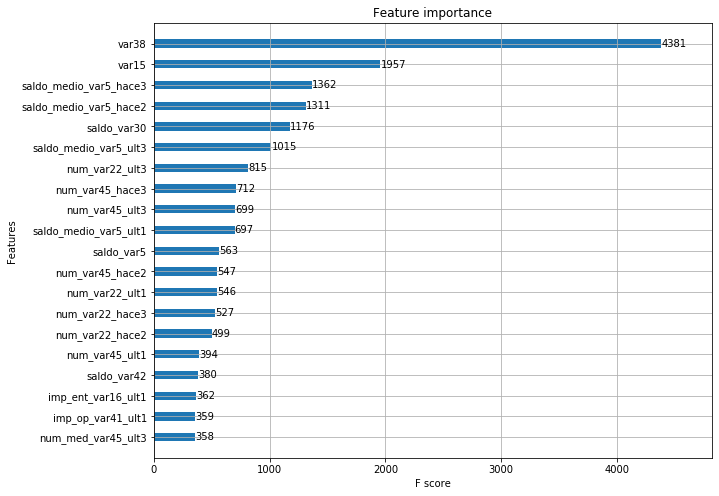

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=500)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[129]	valid_0's auc: 0.836156	valid_0's binary_logloss: 0.140809
[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.13940

In [18]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimator를 200으로 감소
lgbm_clf=LGBMClassifier(n_estimators=200)

params={'num_leaves':[32, 64],
       'max_depth':[128, 160],
       'min_child_samples':[60, 100],
       'sub_sample':[0.8, 1]}

# cv는 3으로 지정
gridcv=GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score=roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[28]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.139828
[29]	valid_0's auc: 0.873959	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.83751	valid_1's binary_logloss: 0.139781
[30]	valid_0's auc: 0.874666	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.837891	valid_1's binary_logloss: 0.139667
[31]	valid_0's auc: 0.875615	valid_0's binary_logloss: 0.123703	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139545
[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc:

[23]	valid_0's auc: 0.868549	valid_0's binary_logloss: 0.126489	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.14015
[24]	valid_0's auc: 0.869053	valid_0's binary_logloss: 0.126193	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.139968
[25]	valid_0's auc: 0.869728	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.839059	valid_1's binary_logloss: 0.139803
[26]	valid_0's auc: 0.870373	valid_0's binary_logloss: 0.125571	valid_1's auc: 0.839138	valid_1's binary_logloss: 0.139698
[27]	valid_0's auc: 0.871341	valid_0's binary_logloss: 0.125257	valid_1's auc: 0.838837	valid_1's binary_logloss: 0.139664
[28]	valid_0's auc: 0.872255	valid_0's binary_logloss: 0.124955	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139614
[29]	valid_0's auc: 0.872979	valid_0's binary_logloss: 0.124683	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139634
[30]	valid_0's auc: 0.873557	valid_0's binary_logloss: 0.12443	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139581
[31]	valid_0's auc: 

[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.122582	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.140133
[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_logloss: 0.151081	valid_1's auc: 0.819989	valid_1's binary_logloss: 0.160086
[3]	valid_0's auc: 0.836893	valid_0's binary_log

[65]	valid_0's auc: 0.891298	valid_0's binary_logloss: 0.117396	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139936
[66]	valid_0's auc: 0.891444	valid_0's binary_logloss: 0.117294	valid_1's auc: 0.837798	valid_1's binary_logloss: 0.139968
[67]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.117199	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.139951
[68]	valid_0's auc: 0.891842	valid_0's binary_logloss: 0.117047	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139964
[69]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140006
[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.116525	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.140129
Early stopping, 

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842061	valid_0's binary_logloss: 0.149839	valid_1's auc: 0.825811	valid_1's binary_logloss: 0.159948
[3]	valid_0's auc: 0.849289	valid_0's binary_logloss: 0.14568	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.156323
[4]	valid_0's auc: 0.85217	valid_0's binary_logloss: 0.142471	valid_1's auc: 0.830597	valid_1's binary_logloss: 0.153508
[5]	valid_0's auc: 0.854239	valid_0's binary_logloss: 0.139777	valid_1's auc: 0.831714	valid_1's binary_logloss: 0.15132
[6]	valid_0's auc: 0.857317	valid_0's binary_logloss: 0.137571	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.149408
[7]	valid_0's auc: 0.860006	valid_0's binary_logloss: 0.13571	valid_1's auc: 0.834676	valid_1's binary_logloss: 0.14797
[8]	valid_0's auc: 0.862097	valid_0's binary_logloss: 0.134125	valid_1's auc: 0.833523	val

[27]	valid_0's auc: 0.889795	valid_0's binary_logloss: 0.11904	valid_1's auc: 0.835371	valid_1's binary_logloss: 0.140341
[28]	valid_0's auc: 0.8904	valid_0's binary_logloss: 0.118653	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.140409
[29]	valid_0's auc: 0.891515	valid_0's binary_logloss: 0.118177	valid_1's auc: 0.834421	valid_1's binary_logloss: 0.14043
[30]	valid_0's auc: 0.892538	valid_0's binary_logloss: 0.117737	valid_1's auc: 0.834461	valid_1's binary_logloss: 0.14048
[31]	valid_0's auc: 0.893059	valid_0's binary_logloss: 0.11742	valid_1's auc: 0.834053	valid_1's binary_logloss: 0.140513
[32]	valid_0's auc: 0.893934	valid_0's binary_logloss: 0.117057	valid_1's auc: 0.83418	valid_1's binary_logloss: 0.140434
[33]	valid_0's auc: 0.894932	valid_0's binary_logloss: 0.116716	valid_1's auc: 0.833793	valid_1's binary_logloss: 0.140491
[34]	valid_0's auc: 0.895434	valid_0's binary_logloss: 0.116371	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.140476
[35]	valid_0's auc: 0.8

[6]	valid_0's auc: 0.857317	valid_0's binary_logloss: 0.137571	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.149408
[7]	valid_0's auc: 0.860006	valid_0's binary_logloss: 0.13571	valid_1's auc: 0.834676	valid_1's binary_logloss: 0.14797
[8]	valid_0's auc: 0.862097	valid_0's binary_logloss: 0.134125	valid_1's auc: 0.833523	valid_1's binary_logloss: 0.146851
[9]	valid_0's auc: 0.863502	valid_0's binary_logloss: 0.132674	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.145855
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[11]	valid_0's auc: 0.867991	valid_0's binary_logloss: 0.130246	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.14443
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872

[33]	valid_0's auc: 0.894932	valid_0's binary_logloss: 0.116716	valid_1's auc: 0.833793	valid_1's binary_logloss: 0.140491
[34]	valid_0's auc: 0.895434	valid_0's binary_logloss: 0.116371	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.140476
[35]	valid_0's auc: 0.896238	valid_0's binary_logloss: 0.11604	valid_1's auc: 0.833608	valid_1's binary_logloss: 0.140613
[36]	valid_0's auc: 0.896761	valid_0's binary_logloss: 0.115738	valid_1's auc: 0.833866	valid_1's binary_logloss: 0.140566
[37]	valid_0's auc: 0.897255	valid_0's binary_logloss: 0.115445	valid_1's auc: 0.833835	valid_1's binary_logloss: 0.140618
[38]	valid_0's auc: 0.897979	valid_0's binary_logloss: 0.115107	valid_1's auc: 0.833409	valid_1's binary_logloss: 0.14069
[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc

[12]	valid_0's auc: 0.853454	valid_0's binary_logloss: 0.133039	valid_1's auc: 0.839037	valid_1's binary_logloss: 0.143056
[13]	valid_0's auc: 0.854721	valid_0's binary_logloss: 0.132319	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.142504
[14]	valid_0's auc: 0.85546	valid_0's binary_logloss: 0.131677	valid_1's auc: 0.838268	valid_1's binary_logloss: 0.142058
[15]	valid_0's auc: 0.856819	valid_0's binary_logloss: 0.131046	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.141834
[16]	valid_0's auc: 0.857561	valid_0's binary_logloss: 0.130517	valid_1's auc: 0.83725	valid_1's binary_logloss: 0.141464
[17]	valid_0's auc: 0.858305	valid_0's binary_logloss: 0.129992	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.859993	valid_0's binary_logloss: 0.129467	valid_1's auc: 0.836921	valid_1's binary_logloss: 0.140976
[19]	valid_0's auc: 0.86106	valid_0's binary_logloss: 0.129012	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.140875
[20]	valid_0's auc: 

[36]	valid_0's auc: 0.875729	valid_0's binary_logloss: 0.123737	valid_1's auc: 0.839216	valid_1's binary_logloss: 0.139225
[37]	valid_0's auc: 0.876555	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.839126	valid_1's binary_logloss: 0.139239
Early stopping, best iteration is:
[7]	valid_0's auc: 0.850111	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.840232	valid_1's binary_logloss: 0.147468
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827905	valid_0's binary_logloss: 0.151337	valid_1's auc: 0.82145	valid_1's binary_logloss: 0.160211
[3]	valid_0's auc: 0.837862	valid_0's binary_logloss: 0.147478	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.156489
[4]	valid_0's auc: 0.840611	valid_0's binary_logloss: 0.144436	valid_1's auc: 0.831962	valid_1's binary_logloss: 0.153536
[5]	valid_0's auc: 0.843113	valid_0's binary_loglo

[67]	valid_0's auc: 0.887341	valid_0's binary_logloss: 0.118646	valid_1's auc: 0.837935	valid_1's binary_logloss: 0.139839
[68]	valid_0's auc: 0.887601	valid_0's binary_logloss: 0.118505	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.139839
[69]	valid_0's auc: 0.887954	valid_0's binary_logloss: 0.11833	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.139867
[70]	valid_0's auc: 0.888114	valid_0's binary_logloss: 0.118209	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.139919
[71]	valid_0's auc: 0.888481	valid_0's binary_logloss: 0.118049	valid_1's auc: 0.837821	valid_1's binary_logloss: 0.139893
[72]	valid_0's auc: 0.888835	valid_0's binary_logloss: 0.117903	valid_1's auc: 0.837731	valid_1's binary_logloss: 0.139952
[73]	valid_0's auc: 0.889134	valid_0's binary_logloss: 0.117758	valid_1's auc: 0.837899	valid_1's binary_logloss: 0.139962
[74]	valid_0's auc: 0.889144	valid_0's binary_logloss: 0.117691	valid_1's auc: 0.83792	valid_1's binary_logloss: 0.13998
[75]	valid_0's auc: 

[6]	valid_0's auc: 0.848508	valid_0's binary_logloss: 0.139952	valid_1's auc: 0.840056	valid_1's binary_logloss: 0.149011
[7]	valid_0's auc: 0.850111	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.840232	valid_1's binary_logloss: 0.147468
[8]	valid_0's auc: 0.851973	valid_0's binary_logloss: 0.136906	valid_1's auc: 0.839018	valid_1's binary_logloss: 0.146195
[9]	valid_0's auc: 0.8532	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.145217
[10]	valid_0's auc: 0.85447	valid_0's binary_logloss: 0.134586	valid_1's auc: 0.838205	valid_1's binary_logloss: 0.144268
[11]	valid_0's auc: 0.855157	valid_0's binary_logloss: 0.133674	valid_1's auc: 0.837983	valid_1's binary_logloss: 0.14353
[12]	valid_0's auc: 0.856252	valid_0's binary_logloss: 0.132856	valid_1's auc: 0.83809	valid_1's binary_logloss: 0.142891
[13]	valid_0's auc: 0.857161	valid_0's binary_logloss: 0.132111	valid_1's auc: 0.838622	valid_1's binary_logloss: 0.142263
[14]	valid_0's auc: 0.857

[35]	valid_0's auc: 0.874804	valid_0's binary_logloss: 0.12402	valid_1's auc: 0.837469	valid_1's binary_logloss: 0.139751
[36]	valid_0's auc: 0.875352	valid_0's binary_logloss: 0.123792	valid_1's auc: 0.83736	valid_1's binary_logloss: 0.139769
[37]	valid_0's auc: 0.87599	valid_0's binary_logloss: 0.123559	valid_1's auc: 0.837238	valid_1's binary_logloss: 0.139757
[38]	valid_0's auc: 0.876681	valid_0's binary_logloss: 0.123367	valid_1's auc: 0.837375	valid_1's binary_logloss: 0.139742
[39]	valid_0's auc: 0.877229	valid_0's binary_logloss: 0.123176	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.139777
[40]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.122931	valid_1's auc: 0.837245	valid_1's binary_logloss: 0.139728
[41]	valid_0's auc: 0.878412	valid_0's binary_logloss: 0.122698	valid_1's auc: 0.837189	valid_1's binary_logloss: 0.139754
[42]	valid_0's auc: 0.879389	valid_0's binary_logloss: 0.122487	valid_1's auc: 0.837385	valid_1's binary_logloss: 0.139729
[43]	valid_0's auc:

[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0.875136	valid_0's binary_logloss: 0.125371	valid_1's auc: 0.832742	valid_1's binary_logloss: 0.141507
[20]	valid_0's auc: 0.876197	valid_0's binary_logloss: 0.124814	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.141376
[21]	valid_0's auc: 0.877286	valid_0's binary_logloss: 0.124265	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141369
[22]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.831493	valid_1's binary_logloss: 0.141291
[23]	valid_0's auc: 0.87915	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.141173
[24]	valid_0's auc: 0.88009	valid_0's binary_logloss: 0.122817	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141183
[25]	valid_0's auc: 0.881183	valid_0's binary_logloss: 0.12235	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.141142
[26]	valid_0's auc: 

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_logloss: 0.140492	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.150751
[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	v

[9]	valid_0's auc: 0.861389	valid_0's binary_logloss: 0.133585	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.145534
[10]	valid_0's auc: 0.863665	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834967	valid_1's binary_logloss: 0.144698
[11]	valid_0's auc: 0.865337	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.144026
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[13]	valid_0's auc: 0.868736	valid_0's binary_logloss: 0.129392	valid_1's auc: 0.835221	valid_1's binary_logloss: 0.142859
[14]	valid_0's auc: 0.870248	valid_0's binary_logloss: 0.128555	valid_1's auc: 0.835178	valid_1's binary_logloss: 0.142419
[15]	valid_0's auc: 0.87138	valid_0's binary_logloss: 0.127833	valid_1's auc: 0.834834	valid_1's binary_logloss: 0.14216
[16]	valid_0's auc: 0.872373	valid_0's binary_logloss: 0.127151	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.141863
[17]	valid_0's auc: 0

[32]	valid_0's auc: 0.890464	valid_0's binary_logloss: 0.118854	valid_1's auc: 0.836872	valid_1's binary_logloss: 0.139395
[33]	valid_0's auc: 0.891323	valid_0's binary_logloss: 0.118486	valid_1's auc: 0.836772	valid_1's binary_logloss: 0.139445
[34]	valid_0's auc: 0.892149	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.836389	valid_1's binary_logloss: 0.139504
[35]	valid_0's auc: 0.892998	valid_0's binary_logloss: 0.117793	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.139533
[36]	valid_0's auc: 0.89356	valid_0's binary_logloss: 0.117478	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.139523
[37]	valid_0's auc: 0.894086	valid_0's binary_logloss: 0.117177	valid_1's auc: 0.836152	valid_1's binary_logloss: 0.13956
[38]	valid_0's auc: 0.894901	valid_0's binary_logloss: 0.116796	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.139585
[39]	valid_0's auc: 0.895733	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139544
[40]	valid_0's auc

[57]	valid_0's auc: 0.900882	valid_0's binary_logloss: 0.112423	valid_1's auc: 0.835795	valid_1's binary_logloss: 0.140747
[58]	valid_0's auc: 0.901235	valid_0's binary_logloss: 0.112179	valid_1's auc: 0.835782	valid_1's binary_logloss: 0.140809
Early stopping, best iteration is:
[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_loglos

[28]	valid_0's auc: 0.873243	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837467	valid_1's binary_logloss: 0.139828
[29]	valid_0's auc: 0.873959	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.83751	valid_1's binary_logloss: 0.139781
[30]	valid_0's auc: 0.874666	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.837891	valid_1's binary_logloss: 0.139667
[31]	valid_0's auc: 0.875615	valid_0's binary_logloss: 0.123703	valid_1's auc: 0.83861	valid_1's binary_logloss: 0.139545
[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc:

[25]	valid_0's auc: 0.869728	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.839059	valid_1's binary_logloss: 0.139803
[26]	valid_0's auc: 0.870373	valid_0's binary_logloss: 0.125571	valid_1's auc: 0.839138	valid_1's binary_logloss: 0.139698
[27]	valid_0's auc: 0.871341	valid_0's binary_logloss: 0.125257	valid_1's auc: 0.838837	valid_1's binary_logloss: 0.139664
[28]	valid_0's auc: 0.872255	valid_0's binary_logloss: 0.124955	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139614
[29]	valid_0's auc: 0.872979	valid_0's binary_logloss: 0.124683	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139634
[30]	valid_0's auc: 0.873557	valid_0's binary_logloss: 0.12443	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139581
[31]	valid_0's auc: 0.874202	valid_0's binary_logloss: 0.124188	valid_1's auc: 0.837993	valid_1's binary_logloss: 0.139633
[32]	valid_0's auc: 0.874831	valid_0's binary_logloss: 0.123929	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.139651
[33]	valid_0's auc

[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.122582	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.140133
[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_logloss: 0.151081	valid_1's auc: 0.819989	valid_1's binary_logloss: 0.160086
[3]	valid_0's auc: 0.836893	valid_0's binary_log

[65]	valid_0's auc: 0.891298	valid_0's binary_logloss: 0.117396	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139936
[66]	valid_0's auc: 0.891444	valid_0's binary_logloss: 0.117294	valid_1's auc: 0.837798	valid_1's binary_logloss: 0.139968
[67]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.117199	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.139951
[68]	valid_0's auc: 0.891842	valid_0's binary_logloss: 0.117047	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139964
[69]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140006
[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.116525	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.140129
Early stopping, 

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842061	valid_0's binary_logloss: 0.149839	valid_1's auc: 0.825811	valid_1's binary_logloss: 0.159948
[3]	valid_0's auc: 0.849289	valid_0's binary_logloss: 0.14568	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.156323
[4]	valid_0's auc: 0.85217	valid_0's binary_logloss: 0.142471	valid_1's auc: 0.830597	valid_1's binary_logloss: 0.153508
[5]	valid_0's auc: 0.854239	valid_0's binary_logloss: 0.139777	valid_1's auc: 0.831714	valid_1's binary_logloss: 0.15132
[6]	valid_0's auc: 0.857317	valid_0's binary_logloss: 0.137571	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.149408
[7]	valid_0's auc: 0.860006	valid_0's binary_logloss: 0.13571	valid_1's auc: 0.834676	valid_1's binary_logloss: 0.14797
[8]	valid_0's auc: 0.862097	valid_0's binary_logloss: 0.134125	valid_1's auc: 0.833523	val

[27]	valid_0's auc: 0.889795	valid_0's binary_logloss: 0.11904	valid_1's auc: 0.835371	valid_1's binary_logloss: 0.140341
[28]	valid_0's auc: 0.8904	valid_0's binary_logloss: 0.118653	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.140409
[29]	valid_0's auc: 0.891515	valid_0's binary_logloss: 0.118177	valid_1's auc: 0.834421	valid_1's binary_logloss: 0.14043
[30]	valid_0's auc: 0.892538	valid_0's binary_logloss: 0.117737	valid_1's auc: 0.834461	valid_1's binary_logloss: 0.14048
[31]	valid_0's auc: 0.893059	valid_0's binary_logloss: 0.11742	valid_1's auc: 0.834053	valid_1's binary_logloss: 0.140513
[32]	valid_0's auc: 0.893934	valid_0's binary_logloss: 0.117057	valid_1's auc: 0.83418	valid_1's binary_logloss: 0.140434
[33]	valid_0's auc: 0.894932	valid_0's binary_logloss: 0.116716	valid_1's auc: 0.833793	valid_1's binary_logloss: 0.140491
[34]	valid_0's auc: 0.895434	valid_0's binary_logloss: 0.116371	valid_1's auc: 0.834146	valid_1's binary_logloss: 0.140476
[35]	valid_0's auc: 0.8

[7]	valid_0's auc: 0.860006	valid_0's binary_logloss: 0.13571	valid_1's auc: 0.834676	valid_1's binary_logloss: 0.14797
[8]	valid_0's auc: 0.862097	valid_0's binary_logloss: 0.134125	valid_1's auc: 0.833523	valid_1's binary_logloss: 0.146851
[9]	valid_0's auc: 0.863502	valid_0's binary_logloss: 0.132674	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.145855
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[11]	valid_0's auc: 0.867991	valid_0's binary_logloss: 0.130246	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.14443
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.129245	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.143794
[13]	valid_0's auc: 0.871383	valid_0's binary_logloss: 0.128279	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.143188
[14]	valid_0's auc: 0.872929	valid_0's binary_logloss: 0.127403	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.142967
[15]	valid_0's auc: 0.87

[35]	valid_0's auc: 0.896238	valid_0's binary_logloss: 0.11604	valid_1's auc: 0.833608	valid_1's binary_logloss: 0.140613
[36]	valid_0's auc: 0.896761	valid_0's binary_logloss: 0.115738	valid_1's auc: 0.833866	valid_1's binary_logloss: 0.140566
[37]	valid_0's auc: 0.897255	valid_0's binary_logloss: 0.115445	valid_1's auc: 0.833835	valid_1's binary_logloss: 0.140618
[38]	valid_0's auc: 0.897979	valid_0's binary_logloss: 0.115107	valid_1's auc: 0.833409	valid_1's binary_logloss: 0.14069
[39]	valid_0's auc: 0.898947	valid_0's binary_logloss: 0.114705	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140754
[40]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.114409	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140759
[41]	valid_0's auc: 0.900418	valid_0's binary_logloss: 0.114104	valid_1's auc: 0.833244	valid_1's binary_logloss: 0.140854
[42]	valid_0's auc: 0.901143	valid_0's binary_logloss: 0.113727	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.14096
[43]	valid_0's auc: 

[17]	valid_0's auc: 0.858305	valid_0's binary_logloss: 0.129992	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.859993	valid_0's binary_logloss: 0.129467	valid_1's auc: 0.836921	valid_1's binary_logloss: 0.140976
[19]	valid_0's auc: 0.86106	valid_0's binary_logloss: 0.129012	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.140875
[20]	valid_0's auc: 0.862262	valid_0's binary_logloss: 0.128583	valid_1's auc: 0.83514	valid_1's binary_logloss: 0.140788
[21]	valid_0's auc: 0.863124	valid_0's binary_logloss: 0.128215	valid_1's auc: 0.834338	valid_1's binary_logloss: 0.140701
[22]	valid_0's auc: 0.864137	valid_0's binary_logloss: 0.127857	valid_1's auc: 0.834962	valid_1's binary_logloss: 0.140517
[23]	valid_0's auc: 0.864726	valid_0's binary_logloss: 0.127534	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140485
[24]	valid_0's auc: 0.865628	valid_0's binary_logloss: 0.127205	valid_1's auc: 0.833672	valid_1's binary_logloss: 0.140477
[25]	valid_0's auc:

[7]	valid_0's auc: 0.845284	valid_0's binary_logloss: 0.138482	valid_1's auc: 0.835936	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.847226	valid_0's binary_logloss: 0.137121	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.146629
[9]	valid_0's auc: 0.850143	valid_0's binary_logloss: 0.135919	valid_1's auc: 0.835641	valid_1's binary_logloss: 0.145692
[10]	valid_0's auc: 0.851387	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.835182	valid_1's binary_logloss: 0.144896
[11]	valid_0's auc: 0.852703	valid_0's binary_logloss: 0.133863	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.144127
[12]	valid_0's auc: 0.854998	valid_0's binary_logloss: 0.133034	valid_1's auc: 0.836932	valid_1's binary_logloss: 0.143464
[13]	valid_0's auc: 0.856458	valid_0's binary_logloss: 0.132288	valid_1's auc: 0.836525	valid_1's binary_logloss: 0.143031
[14]	valid_0's auc: 0.857578	valid_0's binary_logloss: 0.131588	valid_1's auc: 0.836371	valid_1's binary_logloss: 0.142638
[15]	valid_0's auc:

[75]	valid_0's auc: 0.889275	valid_0's binary_logloss: 0.117578	valid_1's auc: 0.838045	valid_1's binary_logloss: 0.139953
[76]	valid_0's auc: 0.88948	valid_0's binary_logloss: 0.117479	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.140036
[77]	valid_0's auc: 0.889549	valid_0's binary_logloss: 0.117401	valid_1's auc: 0.837554	valid_1's binary_logloss: 0.140101
[78]	valid_0's auc: 0.889594	valid_0's binary_logloss: 0.117323	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.140162
[79]	valid_0's auc: 0.889725	valid_0's binary_logloss: 0.117242	valid_1's auc: 0.837296	valid_1's binary_logloss: 0.140191
[80]	valid_0's auc: 0.890095	valid_0's binary_logloss: 0.117092	valid_1's auc: 0.837436	valid_1's binary_logloss: 0.140182
[81]	valid_0's auc: 0.890237	valid_0's binary_logloss: 0.116991	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.140185
[82]	valid_0's auc: 0.89035	valid_0's binary_logloss: 0.116893	valid_1's auc: 0.837676	valid_1's binary_logloss: 0.140191
[83]	valid_0's auc

[12]	valid_0's auc: 0.856252	valid_0's binary_logloss: 0.132856	valid_1's auc: 0.83809	valid_1's binary_logloss: 0.142891
[13]	valid_0's auc: 0.857161	valid_0's binary_logloss: 0.132111	valid_1's auc: 0.838622	valid_1's binary_logloss: 0.142263
[14]	valid_0's auc: 0.857996	valid_0's binary_logloss: 0.131389	valid_1's auc: 0.839052	valid_1's binary_logloss: 0.141727
[15]	valid_0's auc: 0.859511	valid_0's binary_logloss: 0.130739	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.141355
[16]	valid_0's auc: 0.860457	valid_0's binary_logloss: 0.130175	valid_1's auc: 0.838898	valid_1's binary_logloss: 0.141072
[17]	valid_0's auc: 0.861101	valid_0's binary_logloss: 0.129656	valid_1's auc: 0.838785	valid_1's binary_logloss: 0.140731
[18]	valid_0's auc: 0.862022	valid_0's binary_logloss: 0.12915	valid_1's auc: 0.839358	valid_1's binary_logloss: 0.140433
[19]	valid_0's auc: 0.863252	valid_0's binary_logloss: 0.128659	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.140181
[20]	valid_0's auc

[44]	valid_0's auc: 0.880265	valid_0's binary_logloss: 0.12209	valid_1's auc: 0.837043	valid_1's binary_logloss: 0.139706
[45]	valid_0's auc: 0.880695	valid_0's binary_logloss: 0.121908	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.139671
[46]	valid_0's auc: 0.881124	valid_0's binary_logloss: 0.121712	valid_1's auc: 0.837228	valid_1's binary_logloss: 0.139706
[47]	valid_0's auc: 0.881391	valid_0's binary_logloss: 0.121548	valid_1's auc: 0.837146	valid_1's binary_logloss: 0.139699
[48]	valid_0's auc: 0.881926	valid_0's binary_logloss: 0.121346	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.882497	valid_0's binary_logloss: 0.121183	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.13965
[50]	valid_0's auc: 0.882962	valid_0's binary_logloss: 0.121013	valid_1's auc: 0.837347	valid_1's binary_logloss: 0.139684
[51]	valid_0's auc: 0.883328	valid_0's binary_logloss: 0.120868	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.139662
[52]	valid_0's auc

[25]	valid_0's auc: 0.881183	valid_0's binary_logloss: 0.12235	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.141142
[26]	valid_0's auc: 0.882242	valid_0's binary_logloss: 0.121911	valid_1's auc: 0.83122	valid_1's binary_logloss: 0.141125
[27]	valid_0's auc: 0.882894	valid_0's binary_logloss: 0.121503	valid_1's auc: 0.830821	valid_1's binary_logloss: 0.141169
[28]	valid_0's auc: 0.883863	valid_0's binary_logloss: 0.121051	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.141164
[29]	valid_0's auc: 0.884664	valid_0's binary_logloss: 0.12066	valid_1's auc: 0.830255	valid_1's binary_logloss: 0.141239
[30]	valid_0's auc: 0.885346	valid_0's binary_logloss: 0.120322	valid_1's auc: 0.829487	valid_1's binary_logloss: 0.141355
[31]	valid_0's auc: 0.88669	valid_0's binary_logloss: 0.119914	valid_1's auc: 0.829648	valid_1's binary_logloss: 0.141339
[32]	valid_0's auc: 0.887524	valid_0's binary_logloss: 0.119542	valid_1's auc: 0.829315	valid_1's binary_logloss: 0.14135
[33]	valid_0's auc: 0

[10]	valid_0's auc: 0.863187	valid_0's binary_logloss: 0.132297	valid_1's auc: 0.835558	valid_1's binary_logloss: 0.144397
[11]	valid_0's auc: 0.86518	valid_0's binary_logloss: 0.131209	valid_1's auc: 0.835465	valid_1's binary_logloss: 0.143714
[12]	valid_0's auc: 0.866937	valid_0's binary_logloss: 0.130224	valid_1's auc: 0.835379	valid_1's binary_logloss: 0.143043
[13]	valid_0's auc: 0.869703	valid_0's binary_logloss: 0.129241	valid_1's auc: 0.836269	valid_1's binary_logloss: 0.142451
[14]	valid_0's auc: 0.870923	valid_0's binary_logloss: 0.128427	valid_1's auc: 0.836369	valid_1's binary_logloss: 0.142023
[15]	valid_0's auc: 0.872259	valid_0's binary_logloss: 0.127649	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.141652
[16]	valid_0's auc: 0.873489	valid_0's binary_logloss: 0.126903	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.141407
[17]	valid_0's auc: 0.874492	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.836201	valid_1's binary_logloss: 0.141126
[18]	valid_0's au

[18]	valid_0's auc: 0.874082	valid_0's binary_logloss: 0.125944	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.141517
[19]	valid_0's auc: 0.875136	valid_0's binary_logloss: 0.125371	valid_1's auc: 0.832742	valid_1's binary_logloss: 0.141507
[20]	valid_0's auc: 0.876197	valid_0's binary_logloss: 0.124814	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.141376
[21]	valid_0's auc: 0.877286	valid_0's binary_logloss: 0.124265	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141369
[22]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.831493	valid_1's binary_logloss: 0.141291
[23]	valid_0's auc: 0.87915	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.831944	valid_1's binary_logloss: 0.141173
[24]	valid_0's auc: 0.88009	valid_0's binary_logloss: 0.122817	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.141183
[25]	valid_0's auc: 0.881183	valid_0's binary_logloss: 0.12235	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.141142
[26]	valid_0's auc: 

[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842399	valid_0's binary_logloss: 0.150505	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.847465	valid_0's binary_logloss: 0.146325	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.155994
[4]	valid_0's auc: 0.850024	valid_0's binary_logloss: 0.14313	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.153168
[5]	valid_0's auc: 0.853487	valid_0's binary_logloss: 0.140492	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.150751
[6]	valid_0's auc: 0.855865	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.148857
[7]	valid_0's auc: 0.857298	valid_0's binary_logloss: 0.136482	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.147407
[8]	valid_0's auc: 0.858957	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.835673	v

[10]	valid_0's auc: 0.855596	valid_0's binary_logloss: 0.134048	valid_1's auc: 0.843186	valid_1's binary_logloss: 0.143872
[11]	valid_0's auc: 0.856352	valid_0's binary_logloss: 0.133075	valid_1's auc: 0.843465	valid_1's binary_logloss: 0.14305
[12]	valid_0's auc: 0.857769	valid_0's binary_logloss: 0.132232	valid_1's auc: 0.843222	valid_1's binary_logloss: 0.142376
[13]	valid_0's auc: 0.859429	valid_0's binary_logloss: 0.131427	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.141783
[14]	valid_0's auc: 0.86094	valid_0's binary_logloss: 0.130658	valid_1's auc: 0.843389	valid_1's binary_logloss: 0.141419
[15]	valid_0's auc: 0.862567	valid_0's binary_logloss: 0.129955	valid_1's auc: 0.84365	valid_1's binary_logloss: 0.141
[16]	valid_0's auc: 0.864351	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.84379	valid_1's binary_logloss: 0.140661
[17]	valid_0's auc: 0.865942	valid_0's binary_logloss: 0.128724	valid_1's auc: 0.843552	valid_1's binary_logloss: 0.140416
[18]	valid_0's auc: 0.8

In [19]:
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: